In [1]:
%pylab inline

import pandas as pd
from adjustText import adjust_text

Populating the interactive namespace from numpy and matplotlib


In [2]:
def annotate(ax, x, y, labels, lim=300, size=11):
    texts =[]
    for i, l in enumerate(labels):
        texts.append(ax.text(x[i], y[i], l, alpha=0.8))
    adjust_text( texts, force_text=0.2, size=11, arrowprops=dict(arrowstyle="-",color='k', alpha=0.3), ax=ax,lim=lim,
                 expand_objects=(1., 1.), expand_points=(1.05, 1.2), force_objects=(0., 0.))

In [3]:
subreddit_weights = pd.read_csv('subreddit_weights.csv.gz', index_col=0)
subreddit_weights.head()

,weight,word_count
007,0.0,1188
00sRock,0.0,709
00sdesign,0.0,1216
01246,0.0,1576
077throwaway,0.0,50


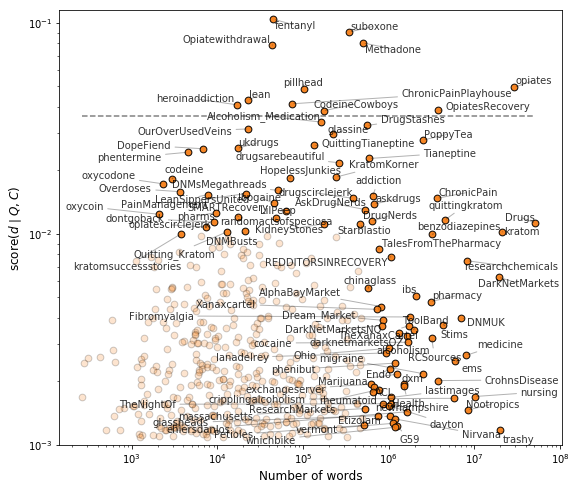

In [4]:
top = 500
subreddit_sorted = subreddit_weights.sort_values('weight', ascending=False)[:top]
sw = subreddit_sorted.weight
sc = subreddit_sorted.word_count

# plot the top 500 subreddits with small alpha
figure(figsize=(9,8))
ax = plt.gca()
scatter(sc, sw, s=45,marker='o', alpha=0.2, edgecolor='k', c='#F57B11',)
xscale('log')
yscale('log')
xlabel('Number of words', fontdict={'size':12})
ylabel('$\mathrm{score}(d \mid Q,C)$', fontdict={'size':12})

threshold = (sw.iloc[10]+sw.iloc[11])/2
plt.hlines(threshold, sc.min(), sc.max(),
           colors='k', linestyles='dashed', alpha=0.5)
ylim(1e-3, 0.115)

# select subreddits to plot with annotations
s1 = sc.copy()
s1 = s1[s1>5e5]

s2 = sw
s2 = s2[s2>1e-2]

s = pd.concat([s1, s2]).index.drop_duplicates()

# plot with annotation and with higher alpha
annotate(ax, sc[s].values, sw[s].values, s, lim=1000)
scatter(sc[s].values, sw[s].values,
        s=45,marker='o', alpha=0.9, edgecolor='k', c='#F57B11',);

# plt.savefig('top_subreddits.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

In [5]:
df_terms = pd.read_csv('term_weights.csv.gz', index_col=0)
df_terms.head()

,weight,prob,opiate_count
term,,,
methadone,6.254937,1.309260e-06,18563.0
subutex,5.760642,1.269625e-07,2366.0
suboxone,5.699057,9.604678e-07,15642.0
buprenorphine,5.389824,1.428874e-07,1805.0
opiate,5.163913,7.604309e-06,61273.0


In [6]:
related_kw = ['buprenorphine', 'suboxone', 'methadone', 'naloxone', 'oxycodone', 'opiate', 'bupe', 'subutex', 
              'fentanyl', 'fent', 'oxy', 'opioid', 'norcos', 'morphine', 'hydrocodone', 'opiat', 'oxymorphone', 
              'percocet', 'codeine', 'heroin', 'vicodin', 'dilaudid', 'oxys', 'opana', 'naltrexone', 
              'hydromorphone', 'narcan', 'zubsolv', 'opiod', 'oxycontin', 'norco', 'opioids', 'lortab', 
              'methodone', 'vivitrol', 'percs', 'loperamide', 'immodium', 'tramadol', 'imodium', 'lopermide', 
              'lope', 'suboxen', 'opiates', 'bupenorphine', 'carfent', 'ecp', 'ultram', 'methadose']

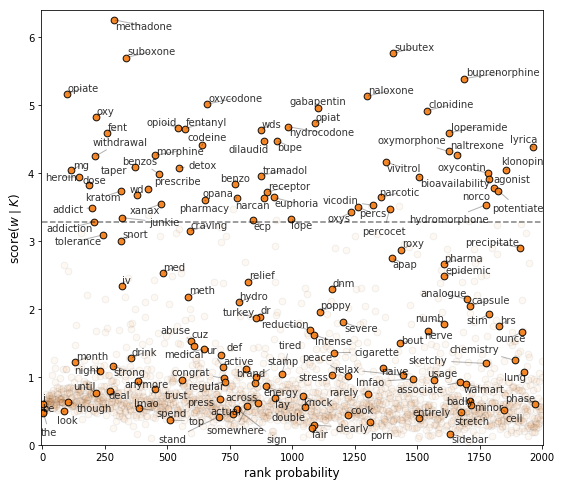

In [8]:
figure(figsize=(9,8))
ax = plt.gca()
top = 2000

# sort by count in selected opiate subreddits (opiate_count) and get the rank
df_terms_sel = df_terms.sort_values('opiate_count', ascending=False)[:top].sort_values('weight', ascending=False).copy()
df_terms_sel['rank'] = df_terms_sel.opiate_count.rank(ascending=False)

# plot all points with small alpha
scatter(df_terms_sel['rank'], df_terms_sel.weight,
        s=45,marker='o', alpha=0.05, edgecolor='k', c='#F57B11')
plt.ylim(0, 6.4)
plt.xlim(-5, 2005)
plt.xlabel('rank probability', fontdict={'size':12})
plt.ylabel('$\mathrm{score}(w \mid K)$', fontdict={'size':12})

# plot the threshold line
threshold = 3.28346175688 #(df_terms_sel.iloc[100].weight+df_terms_sel.iloc[101].weight)/2
plt.hlines(threshold,
           0, df_terms_sel['rank'].max(),
           colors='k', linestyles='dashed', alpha=0.5)

# select terms to plot with high alpha and annotation:
# 1) all top 50
s1 = df_terms_sel[:50]
# 2) top 4 by rank
s2 = df_terms_sel[:top]
s2 = s2[s2['rank']<4]
# 3.1) every 5th from top 50 to top 200
s31 = df_terms_sel[50:200:5]
# 3.2) every 10th from top 200 to top 500
s32 = df_terms_sel[200:500:10]
# 4) every 50th from top 500 to top 2000
s4 = df_terms_sel[500:top:51]
# 5) all keywords in top 100 by weight, manyally selected
skw = df_terms_sel[df_terms_sel.index.isin(related_kw)]

s = pd.concat([s1,s2,s31,s32,s4,skw]).drop_duplicates().index
annotate(ax, df_terms_sel.loc[s]['rank'], df_terms_sel.loc[s].weight, s, lim=500, size=10)
scatter(df_terms_sel.loc[s]['rank'], df_terms_sel.loc[s].weight,
        s=45,marker='o', alpha=0.9, edgecolor='k', c='#F57B11');
# plt.savefig('top_terms_rank_score.pdf', transparent=True, bbox_inches='tight', pad_inches=0)